## Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\zhaoshuting\Documents\研究生\Module 3\Machine Learning in Finance\Fake Job\EDA\data for EDA.csv',engine ='python')

First, we take a look at how many counts of real and fake posts there are, in relation to the top unique values of a feature.

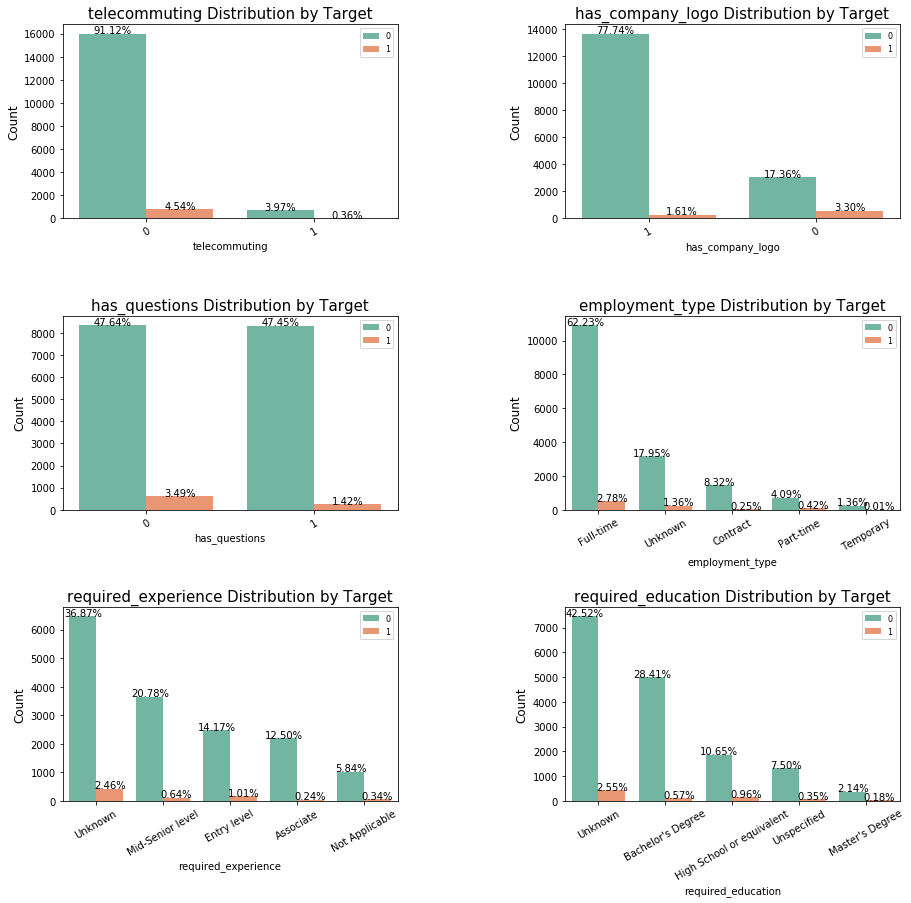

In [5]:
cat_eda_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 

grid = gridspec.GridSpec(5, 2, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(15,25)) 

for n, col in enumerate(df[cat_eda_columns]): 
    ax = plt.subplot(grid[n]) 
    sns.countplot(x=col, data=df, hue='fraudulent', palette='Set2', order=df[col].value_counts().iloc[:5].index) 
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{col} Distribution by Target', fontsize=15) 
    xlabels = ax.get_xticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=30) 
    total = len(df)
    sizes=[] 
    for p in ax.patches: 
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    
plt.show()

The first thing we notice is the imbalance of sample. We will deal with this problem in the tuning part.

From the graph, we can see that:

  ·Fraudulent posts are mostly not posted as telecommuting ones, like real posts. 

  ·Fraudulent posts mostly do not contain a company logo, unlike real posts. 

  ·Fraudulent posts have an equal mix of either having a questionnaire or not, like  real posts. 

  ·Fraudulent posts are mostly full-time, like real posts. 

  ·Fraudulent posts, also do not specify the required experience and education necessary, like real posts.

Then we want to see whether the length of 'company_profile', 'description', 'requirements', 'benefits' can be used to detect fake jobposting.

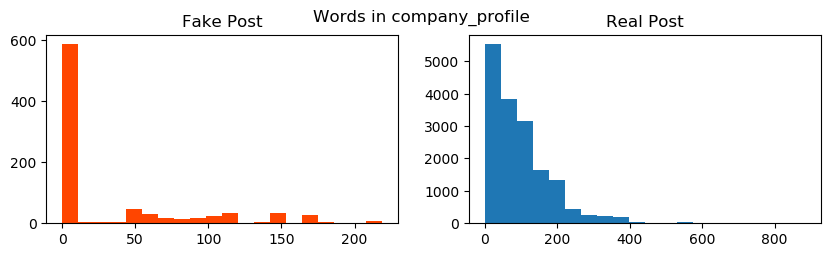

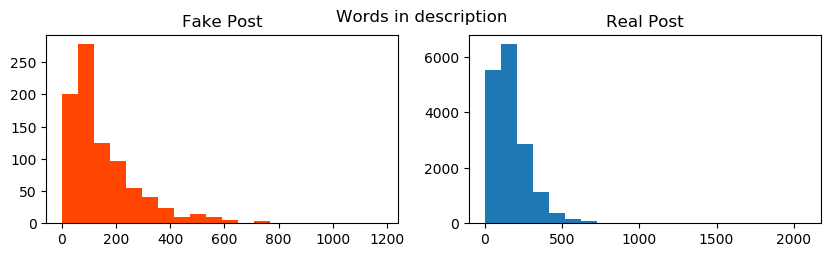

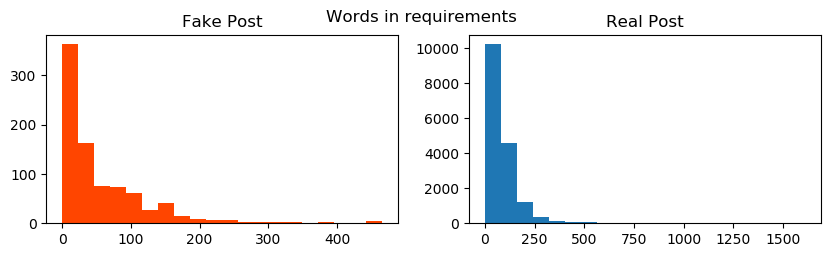

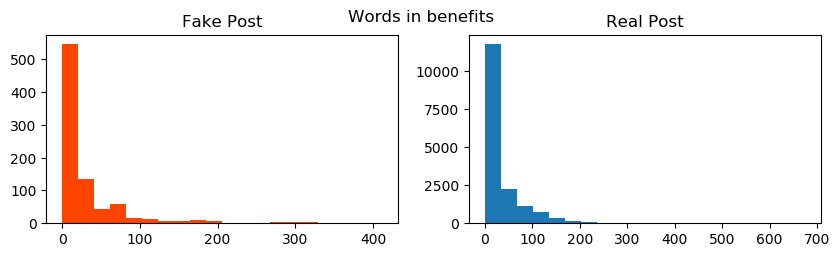

In [4]:
text_cols = ['company_profile', 'description', 'requirements', 'benefits']

for col in text_cols:
    fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(10, 2.5), dpi=100)
    num=df[df["fraudulent"]==1][col].str.split().map(lambda x: len(x))
    ax1.hist(num,bins = 20,color='orangered')
    ax1.set_title('Fake Post')
    num=df[df["fraudulent"]==0][col].str.split().map(lambda x: len(x))
    ax2.hist(num, bins = 20)
    ax2.set_title('Real Post')
    fig.suptitle(f'Words in {col}')
    plt.show()

We can see that fake jobposting posts similar-length description, requirements and benefit to make them more reliable. While there's differences in company profile. Fake jobpostings are not tend to post short & long company profile.